# Problem Statement 1 : Manufacturing two products using two resources

In [50]:
#!pip install pulp

In [51]:
import pulp
from pulp import *

In [52]:
# looking for an optimal maximum so we use LpMaximize (default = LpMinimize)
manufacturing_products_lp = pulp.LpProblem("Manufacturing 2 types of products using 2 types of resources", 
                                           pulp.LpMaximize)

# Setting the lower and upper bounds for the decision variables
# Default lowBound is negative infinity
# Default upBound is positive infinity
# Default cat is 'Continuous'

P1 = pulp.LpVariable('P1', lowBound=0, cat='Integer')
P2 = pulp.LpVariable('P2', lowBound=0, cat='Integer')

# The objective function and constraints are added using the += operator to our model.

# Objective function
manufacturing_products_lp += 6 * P1 + 5 * P2, "Z"

# Constraints
manufacturing_products_lp += P1 + P2 <= 5, "C1"
manufacturing_products_lp += 3 * P1 + 2 * P2 <= 12, "C2"

In [53]:
manufacturing_products_lp

Manufacturing 2 types of products using 2 types of resources:
MAXIMIZE
6*P1 + 5*P2 + 0
SUBJECT TO
C1: P1 + P2 <= 5

C2: 3 P1 + 2 P2 <= 12

VARIABLES
0 <= P1 Integer
0 <= P2 Integer

In [54]:
manufacturing_products_lp.solve()

# There are 5 status codes: 'Not Solved', 'Optimal', 'Infeasible', 'Unbounded', 'Undefined
pulp.LpStatus[manufacturing_products_lp.status]

'Optimal'

In [55]:
print("The optimized solution :", pulp.value(manufacturing_products_lp.objective) )
for variable in manufacturing_products_lp.variables():
    print(variable.name, variable.varValue)

The optimized solution : 27.0
P1 2.0
P2 3.0


# Problem Statement 2 : Transportation Problem

In [82]:
# Instantiate the problem class 
# Looking for an optimal minimum so we use LpMinimize (default = LpMinimize)

fruits_transportation_lp = pulp.LpProblem("Transportation problem: Fruits to the processing plants", pulp.LpMinimize)

In [83]:
# Setting the decision variables as Binary.

x14 = pulp.LpVariable('Dora_Ocala', lowBound=0, cat = 'Integer')
x15 = pulp.LpVariable('Dora_Orlando', lowBound=0, cat = 'Integer')
x16 = pulp.LpVariable('Dora_Leesburg', lowBound=0, cat = 'Integer')
x24 = pulp.LpVariable('Eustis_Ocala', lowBound=0, cat = 'Integer')
x25 = pulp.LpVariable('Eustis_Orlando', lowBound=0, cat = 'Integer')
x26 = pulp.LpVariable('Eustis_Leesburg', lowBound=0, cat = 'Integer')
x34 = pulp.LpVariable('Clermont_Ocala', lowBound=0, cat = 'Integer')
x35 = pulp.LpVariable('Clermont_Orlando', lowBound=0, cat = 'Integer')
x36 = pulp.LpVariable('Clermont_Leesburg', lowBound=0, cat = 'Integer')

In [84]:
# The objective function and constraints are added using the += operator to our model.

# Objective function: Total distance fruit is shipped.

fruits_transportation_lp += 21 * x14 + 50 * x15 + 40 * x16 +\
                            35 * x24 + 30 * x25 + 22 * x26 +\
                            55 * x34 + 20 * x35 + 25 * x36, "Z"

# Constraints
# Capacity restriction for Ocala
fruits_transportation_lp += x14 + x24 + x34 <= 200000

# Capacity restriction for Orlando
fruits_transportation_lp += x15 + x25 + x35 <= 600000

# Capacity restriction for Leesburg
fruits_transportation_lp += x16 +x26 + x36 <= 225000

# Supply available at Mt. Dora
fruits_transportation_lp += x14 + x15 + x16 == 275000

# Supply available at Eustis
fruits_transportation_lp += x24 + x25 + x26 == 400000

# Supply available at Clermont
fruits_transportation_lp += x34 + x35 + x36 == 300000



In [85]:
fruits_transportation_lp

Transportation problem: Fruits to the processing plants:
MINIMIZE
25*Clermont_Leesburg + 55*Clermont_Ocala + 20*Clermont_Orlando + 40*Dora_Leesburg + 21*Dora_Ocala + 50*Dora_Orlando + 22*Eustis_Leesburg + 35*Eustis_Ocala + 30*Eustis_Orlando + 0
SUBJECT TO
_C1: Clermont_Ocala + Dora_Ocala + Eustis_Ocala <= 200000

_C2: Clermont_Orlando + Dora_Orlando + Eustis_Orlando <= 600000

_C3: Clermont_Leesburg + Dora_Leesburg + Eustis_Leesburg <= 225000

_C4: Dora_Leesburg + Dora_Ocala + Dora_Orlando = 275000

_C5: Eustis_Leesburg + Eustis_Ocala + Eustis_Orlando = 400000

_C6: Clermont_Leesburg + Clermont_Ocala + Clermont_Orlando = 300000

VARIABLES
0 <= Clermont_Leesburg Integer
0 <= Clermont_Ocala Integer
0 <= Clermont_Orlando Integer
0 <= Dora_Leesburg Integer
0 <= Dora_Ocala Integer
0 <= Dora_Orlando Integer
0 <= Eustis_Leesburg Integer
0 <= Eustis_Ocala Integer
0 <= Eustis_Orlando Integer

In [86]:
fruits_transportation_lp.solve()

# There are 5 status codes: 'Not Solved', 'Optimal', 'Infeasible', 'Unbounded', 'Undefined
pulp.LpStatus[fruits_transportation_lp.status]

'Optimal'

In [87]:
print("The optimized solution for the total distance in bushel/mile :", pulp.value(fruits_transportation_lp.objective))
for variable in fruits_transportation_lp.variables():
    print(variable.name, variable.varValue)
# output is number of bags to ship form x to y

The optimized solution for the total distance in bushel/mile : 24000000.0
Clermont_Leesburg 0.0
Clermont_Ocala 0.0
Clermont_Orlando 300000.0
Dora_Leesburg 75000.0
Dora_Ocala 200000.0
Dora_Orlando 0.0
Eustis_Leesburg 150000.0
Eustis_Ocala 0.0
Eustis_Orlando 250000.0


# Problem Statement 3 : Capital Budget Allocation Problem

In [62]:
# Instantiate the problem class 
# Looking for an optimal maximum so we use LpMaximize (default = LpMinimize)

capital_budget_allocation_lp = pulp.LpProblem("Capital Budget Allocation Problem", pulp.LpMaximize)

In [63]:
type(capital_budget_allocation_lp)

pulp.pulp.LpProblem

In [64]:
# Setting the decision variables as Binary.

x1 = pulp.LpVariable('x1', cat = 'Binary')
x2 = pulp.LpVariable('x2', cat = 'Binary')
x3 = pulp.LpVariable('x3', cat = 'Binary')
x4 = pulp.LpVariable('x4', cat = 'Binary')
x5 = pulp.LpVariable('x5', cat = 'Binary')
x6 = pulp.LpVariable('x6', cat = 'Binary')

In [65]:
# The objective function and constraints are added using the += operator to our model.

# Objective function
capital_budget_allocation_lp += 141 * x1 + 187 * x2 + 121 * x3 + 83 * x4 + 265 * x5 + 127 * x6, "Z"

# Constraints
capital_budget_allocation_lp += 75 * x1 + 90 * x2 + 60 * x3 + 30 * x4 + 100 * x5 + 50 * x6 <= 250
capital_budget_allocation_lp += 25 * x1 + 35 * x2 + 15 * x3 + 20 * x4 + 25 * x5 + 20 * x6 <= 75
capital_budget_allocation_lp += 20 * x1 + 0 * x2 + 15 * x3 + 10 * x4 + 20 * x5 + 10 * x6 <= 50
capital_budget_allocation_lp += 15 * x1 + 0 * x2 + 15 * x3 + 5 * x4 + 20 * x5 + 30 * x6 <= 50
capital_budget_allocation_lp += 10 * x1 + 30 * x2 + 15 * x3 + 5 * x4 + 20 * x5 + 40 * x6 <= 50


In [66]:
capital_budget_allocation_lp

Capital Budget Allocation Problem:
MAXIMIZE
141*x1 + 187*x2 + 121*x3 + 83*x4 + 265*x5 + 127*x6 + 0
SUBJECT TO
_C1: 75 x1 + 90 x2 + 60 x3 + 30 x4 + 100 x5 + 50 x6 <= 250

_C2: 25 x1 + 35 x2 + 15 x3 + 20 x4 + 25 x5 + 20 x6 <= 75

_C3: 20 x1 + 15 x3 + 10 x4 + 20 x5 + 10 x6 <= 50

_C4: 15 x1 + 15 x3 + 5 x4 + 20 x5 + 30 x6 <= 50

_C5: 10 x1 + 30 x2 + 15 x3 + 5 x4 + 20 x5 + 40 x6 <= 50

VARIABLES
0 <= x1 <= 1 Integer
0 <= x2 <= 1 Integer
0 <= x3 <= 1 Integer
0 <= x4 <= 1 Integer
0 <= x5 <= 1 Integer
0 <= x6 <= 1 Integer

In [67]:
capital_budget_allocation_lp.status

0

In [68]:
capital_budget_allocation_lp.solve()
# There are 5 status codes: 'Not Solved', 'Optimal', 'Infeasible', 'Unbounded', 'Undefined
pulp.LpStatus[capital_budget_allocation_lp.status]

'Optimal'

In [69]:
capital_budget_allocation_lp.status

1

In [70]:
print(("The optimized solution:", pulp.value(capital_budget_allocation_lp.objective)))
for variable in capital_budget_allocation_lp.variables():
    print((variable.name, variable.varValue))

('The optimized solution:', 489.0)
('x1', 1.0)
('x2', 0.0)
('x3', 0.0)
('x4', 1.0)
('x5', 1.0)
('x6', 0.0)


# Week off - minimize wage problem 

In [71]:
from IPython.display import Image

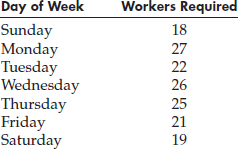

In [72]:
Image('img/week_day_workers.png')

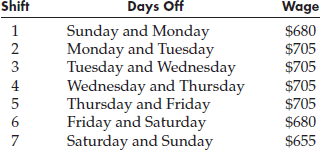

In [73]:
Image('img/week_day_off_wage.png')

In [74]:
week_off_wage_min = pulp.LpProblem("Minimize the wage paid", pulp.LpMinimize)

Take the shift as xi

In [75]:
#step 1 : Identify the variable
x1 = pulp.LpVariable('x1',lowBound= 1, cat = 'Integer')
x2 = pulp.LpVariable('x2',lowBound= 1, cat = 'Integer')
x3 = pulp.LpVariable('x3',lowBound= 1, cat = 'Integer')
x4 = pulp.LpVariable('x4',lowBound= 1, cat = 'Integer')
x5 = pulp.LpVariable('x5',lowBound= 1, cat = 'Integer')
x6 = pulp.LpVariable('x6',lowBound= 1, cat = 'Integer')
x7 = pulp.LpVariable('x7',lowBound= 1, cat = 'Integer')

In [76]:
# objective function
week_off_wage_min += 680 * x1 + 705 * x2 + 705 * x3 + 705 * x4 + 705 * x5 + 680 * x6 + 655 * x7 ,"Z"

In [77]:
# constraints
#sun 
week_off_wage_min += 0 * x1 + 1 * x2 + 1 * x3 + 1 * x4 + 1 * x5 + 1 * x6 + 0 * x7 >= 18
#mon
week_off_wage_min += 0 * x1 + 0 * x2 + 1 * x3 + 1 * x4 + 1 * x5 + 1 * x6 + 1 * x7 >= 27
#tue 
week_off_wage_min += 1 * x1 + 0 * x2 + 0 * x3 + 1 * x4 + 1 * x5 + 1 * x6 + 1 * x7 >= 22
#wed 
week_off_wage_min += 1 * x1 + 1 * x2 + 0 * x3 + 0 * x4 + 1 * x5 + 1 * x6 + 1 * x7 >= 26
#thu
week_off_wage_min += 1 * x1 + 1 * x2 + 1 * x3 + 0 * x4 + 0 * x5 + 1 * x6 + 1 * x7 >= 25
#fri 
week_off_wage_min += 1 * x1 + 1 * x2 + 1 * x3 + 1 * x4 + 0 * x5 + 0 * x6 + 1 * x7 >= 21
#sat 
week_off_wage_min += 1 * x1 + 1 * x2 + 1 * x3 + 1 * x4 + 1 * x5 + 0 * x6 + 0 * x7 >= 19


In [78]:
week_off_wage_min

Minimize the wage paid:
MINIMIZE
680*x1 + 705*x2 + 705*x3 + 705*x4 + 705*x5 + 680*x6 + 655*x7 + 0
SUBJECT TO
_C1: x2 + x3 + x4 + x5 + x6 >= 18

_C2: x3 + x4 + x5 + x6 + x7 >= 27

_C3: x1 + x4 + x5 + x6 + x7 >= 22

_C4: x1 + x2 + x5 + x6 + x7 >= 26

_C5: x1 + x2 + x3 + x6 + x7 >= 25

_C6: x1 + x2 + x3 + x4 + x7 >= 21

_C7: x1 + x2 + x3 + x4 + x5 >= 19

VARIABLES
1 <= x1 Integer
1 <= x2 Integer
1 <= x3 Integer
1 <= x4 Integer
1 <= x5 Integer
1 <= x6 Integer
1 <= x7 Integer

In [79]:
week_off_wage_min.solve()


1

In [80]:
week_off_wage_min.isMIP()

1

In [81]:
print(("The optimized solution:", pulp.value(week_off_wage_min.objective)))
for variable in week_off_wage_min.variables():
    print((variable.name, variable.varValue))

('The optimized solution:', 22540.0)
('x1', 5.0)
('x2', 1.0)
('x3', 5.0)
('x4', 1.0)
('x5', 7.0)
('x6', 4.0)
('x7', 10.0)
